## MACD Strategy for EMFX: Daily follow-up on the signal automated

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
import functools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import investpy as inv

today = pd.datetime.today().strftime("%d/%m/%Y")

#Latam currencies

mxn_ = inv.get_currency_cross_historical_data(currency_cross='USD/MXN', from_date='01/01/2017', to_date=today)
mxn = mxn_[["Close"]].reset_index()
mxn = mxn.rename(columns={'Date': 'date', 'Close': 'usdmxn'})
mxn['date'] = pd.to_datetime(mxn['date'])

clp_ = inv.get_currency_cross_historical_data(currency_cross='USD/CLP', from_date='01/01/2017', to_date=today)
clp = clp_[["Close"]].reset_index()
clp = clp.rename(columns={'Date': 'date', 'Close': 'usdclp'})
clp['date'] = pd.to_datetime(clp['date'])

cop_ = inv.get_currency_cross_historical_data(currency_cross='USD/COP', from_date='01/01/2017', to_date=today)
cop = cop_[["Close"]].reset_index()
cop = cop.rename(columns={'Date': 'date', 'Close': 'usdcop'})
cop['date'] = pd.to_datetime(cop['date'])

pen_ = inv.get_currency_cross_historical_data(currency_cross='USD/PEN', from_date='01/01/2017', to_date=today)
pen = pen_[["Close"]].reset_index()
pen = pen.rename(columns={'Date': 'date', 'Close': 'usdpen'})
pen['date'] = pd.to_datetime(pen['date'])

brl_ = inv.get_currency_cross_historical_data(currency_cross='USD/BRL', from_date='01/01/2017', to_date=today)
brl = brl_[["Close"]].reset_index()
brl = brl.rename(columns={'Date': 'date', 'Close': 'usdbrl'})
brl['date'] = pd.to_datetime(brl['date'])

######
#EMEA currencies

pln_ = inv.get_currency_cross_historical_data(currency_cross='EUR/PLN', from_date='01/01/2017', to_date=today)
pln = pln_[["Close"]].reset_index()
pln = pln.rename(columns={'Date': 'date', 'Close': 'eurpln'})
pln['date'] = pd.to_datetime(pln['date'])

huf_ = inv.get_currency_cross_historical_data(currency_cross='EUR/HUF', from_date='01/01/2017', to_date=today)
huf = huf_[["Close"]].reset_index()
huf = huf.rename(columns={'Date': 'date', 'Close': 'eurhuf'})
huf['date'] = pd.to_datetime(huf['date'])

czk_ = inv.get_currency_cross_historical_data(currency_cross='EUR/CZK', from_date='01/01/2017', to_date=today)
czk = czk_[["Close"]].reset_index()
czk = czk.rename(columns={'Date': 'date', 'Close': 'eurczk'})
czk['date'] = pd.to_datetime(czk['date'])

rub_ = inv.get_currency_cross_historical_data(currency_cross='USD/RUB', from_date='01/01/2017', to_date=today)
rub = rub_[["Close"]].reset_index()
rub = rub.rename(columns={'Date': 'date', 'Close': 'usdrub'})
rub['date'] = pd.to_datetime(rub['date'])

zar_ = inv.get_currency_cross_historical_data(currency_cross='USD/ZAR', from_date='01/01/2017', to_date=today)
zar = zar_[["Close"]].reset_index()
zar = zar.rename(columns={'Date': 'date', 'Close': 'usdzar'})
zar['date'] = pd.to_datetime(zar['date'])

######
#Asian currencies

idr_ = inv.get_currency_cross_historical_data(currency_cross='USD/IDR', from_date='01/01/2017', to_date=today)
idr = idr_[["Close"]].reset_index()
idr = idr.rename(columns={'Date': 'date', 'Close': 'usdidr'})
idr['date'] = pd.to_datetime(idr['date'])

inr_ = inv.get_currency_cross_historical_data(currency_cross='USD/INR', from_date='01/01/2017', to_date=today)
inr = inr_[["Close"]].reset_index()
inr = inr.rename(columns={'Date': 'date', 'Close': 'usdinr'})
inr['date'] = pd.to_datetime(inr['date'])

myr_ = inv.get_currency_cross_historical_data(currency_cross='USD/MYR', from_date='01/01/2017', to_date=today)
myr = myr_[["Close"]].reset_index()
myr = myr.rename(columns={'Date': 'date', 'Close': 'usdmyr'})
myr['date'] = pd.to_datetime(myr['date'])

php_ = inv.get_currency_cross_historical_data(currency_cross='USD/PHP', from_date='01/01/2017', to_date=today)
php = php_[["Close"]].reset_index()
php = php.rename(columns={'Date': 'date', 'Close': 'usdphp'})
php['date'] = pd.to_datetime(php['date'])

krw_ = inv.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date='01/01/2017', to_date=today)
krw = krw_[["Close"]].reset_index()
krw = krw.rename(columns={'Date': 'date', 'Close': 'usdkrw'})
krw['date'] = pd.to_datetime(krw['date'])

In [3]:
### MYR was missing 2 dates
#df1 = myr.copy()
#df2 = pd.DataFrame({'date': ['2022-02-01', '2022-02-02'],
 #                  'usdmyr': [4.1855, 4.1855]})
#df2['date'] = pd.to_datetime(df2['date'])
#myr = pd.concat([df1,df2], ignore_index = True, axis = 0)
#myr

In [4]:
# compile the list of dataframes you want to merge
dfs = [mxn, clp, cop, pen, brl, pln, huf, czk, rub, zar, idr, inr, myr, php, krw]
df_merged = functools.reduce(lambda left,right: pd.merge(left,right,on='date'), dfs)
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged = df_merged.set_index('date')
#df_merged

In [5]:
#calculating daily return
daily_return = df_merged.pct_change(1)
daily_return['latam'] = daily_return[['usdmxn', 'usdclp', 'usdcop', 'usdpen', 'usdbrl']].mean(axis=1)
daily_return['emea'] = daily_return[['eurpln', 'eurhuf', 'eurczk', 'usdrub', 'usdzar']].mean(axis=1)
daily_return['asia'] = daily_return[['usdidr', 'usdinr', 'usdmyr', 'usdphp', 'usdkrw']].mean(axis=1)
daily_return['close'] = daily_return[['latam', 'emea', 'asia']].mean(axis=1)
#daily_return

In [6]:
#selecting the emfx column and replacing NaN with 0
emfx = pd.DataFrame(daily_return['close'])
emfx = emfx.replace(np.nan, 0)
cumulative_ret = ((emfx + 1).cumprod())*100
#cumulative_ret

In [7]:
df = cumulative_ret.copy().reset_index()
df['date'] = pd.to_datetime(df['date'])
df['log_returns'] = np.log(df['close']/df['close'].shift(1))
df=df.set_index('date')
df = df.dropna()
#df

In [8]:
# Calculating the 24-day moving average (MA24)
n = 24
df["sma"] = df.close.rolling(n).mean().round(2)
df = df.dropna()

In [9]:
# Calculating the MACD(12,50,50), where ewm = exponential moving average
period1 = 12
period2 = 50
period3 = 50

#The expontential moving averages
df["ema_12"] = df.close.ewm(span=period1, adjust=False).mean().round(2) #Exponential moving average for 12 days
df["ema_50"] = df.close.ewm(span=period2, adjust=False).mean().round(2) #Exponential moving average for 50 days
#The MACD line represents the difference between short and long exponential moving averages
df['MACD_line'] = (df["ema_12"] - df["ema_50"]).round(3) #The EMA12 minus the EMA50
#The signal line is the 50-day ewm of the difference (MACD_line)
df['signal_line'] = df['MACD_line'].ewm(span=period3, adjust=False).mean().round(3) 
#The histogram represents the difference between the MACD line and the signal line
df['histogram'] = df['MACD_line'] - df['signal_line']

In [10]:
# Signal 1: If the close price is above the 24-day MA, then, buy (1); otherwise, sell (-1)
df['MA_signal'] = np.where(df['close']>df['sma'],1,-1)
# Signal 2: Crossover strategy: If the MACD_line > signal_line, then, buy (1); otherwise, sell (-1)
df['MACD_signal'] = np.where(df['MACD_line']>df['signal_line'],1,-1)
# Adding the two signals, we will have 2 (both buy), 0 (divergent) or -2 (both sell)
df['Combined_signal'] = df['MA_signal'] + df['MACD_signal']
# The strategy (-1 is sell, 0 is neutral, 1 is buy) is the value of the combined signal divided by 2
df['Strategy'] = df['Combined_signal'] / 2

In [11]:
# For daily follow up
df.tail(10)

,close,log_returns,sma,ema_12,ema_50,MACD_line,signal_line,histogram,MA_signal,MACD_signal,Combined_signal,Strategy
date,,,,,,,,,,,,
2022-01-21,112.583219,-0.000239,113.78,113.12,113.55,-0.43,0.485,-0.915,-1,-1,-2,-1.0
2022-01-24,113.292786,0.006283,113.72,113.14,113.54,-0.40,0.450,-0.850,-1,-1,-2,-1.0
2022-01-25,113.086508,-0.001822,113.65,113.13,113.53,-0.40,0.417,-0.817,-1,-1,-2,-1.0
2022-01-26,113.275385,0.001669,113.58,113.16,113.52,-0.36,0.386,-0.746,-1,-1,-2,-1.0
2022-01-27,113.207827,-0.000597,113.53,113.16,113.50,-0.34,0.358,-0.698,-1,-1,-2,-1.0
2022-01-28,113.375240,0.001478,113.49,113.20,113.50,-0.30,0.332,-0.632,-1,-1,-2,-1.0
2022-01-31,112.746285,-0.005563,113.43,113.13,113.47,-0.34,0.306,-0.646,-1,-1,-2,-1.0
2022-02-02,112.453319,-0.002602,113.37,113.02,113.43,-0.41,0.278,-0.688,-1,-1,-2,-1.0
2022-02-03,112.597141,0.001278,113.31,112.96,113.40,-0.44,0.249,-0.689,-1,-1,-2,-1.0


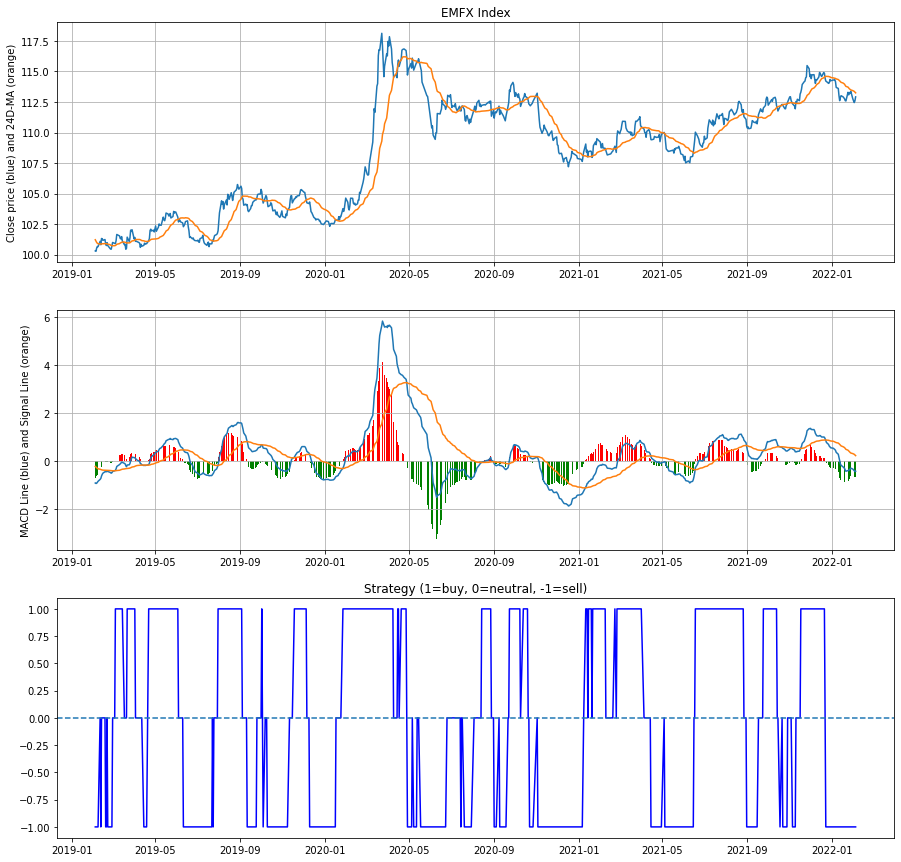

In [12]:
# Plotting the data

df_red = df.iloc[500:]
df_reduced = df_red.reset_index()

plt.figure(figsize=(15,15))

ax1 = plt.subplot(3, 1, 1)
plt.plot(df_reduced['date'], df_reduced[['close', 'sma']])
plt.title("EMFX Index")
plt.ylabel("Close price (blue) and 24D-MA (orange)")
plt.grid()

ax2 = plt.subplot(3, 1, 2, sharex=ax1)
plt.bar(df_reduced['date'], df_reduced['histogram'], color=(df_reduced['histogram'] > 0).map({True: 'r',False: 'g'}))
plt.plot(df_reduced['date'], df_reduced[['MACD_line', 'signal_line']])
plt.ylabel("MACD Line (blue) and Signal Line (orange)")
plt.grid()

ax3 = plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(df_reduced['date'], df_reduced['Strategy'], color='b')
ax3.set_title("Strategy (1=buy, 0=neutral, -1=sell)")
ax3.axhline(0, ls='--')
plt.show()